This is a notebook to experiment with life satisfaction data. Experiments when I was reading chapter 01 of book "Hands-On Machine Learning with Scikit-Learn and TensorFlow" by Aurélien Géron.

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
%matplotlib inline

In [3]:
ds1 = pd.read_csv("datasets/lifesat/oecd_bli_2015.csv")

In [4]:
ds1.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [9]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
LOCATION                 3292 non-null object
Country                  3292 non-null object
INDICATOR                3292 non-null object
Indicator                3292 non-null object
MEASURE                  3292 non-null object
Measure                  3292 non-null object
INEQUALITY               3292 non-null object
Inequality               3292 non-null object
Unit Code                3292 non-null object
Unit                     3292 non-null object
PowerCode Code           3292 non-null int64
PowerCode                3292 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    3292 non-null float64
Flag Codes               1120 non-null object
Flags                    1120 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 437.3+ KB


In [15]:
ds1["INEQUALITY"].unique()

array(['TOT', 'MN', 'WMN', 'HGH', 'LW'], dtype=object)

In [16]:
ds1["Indicator"].unique()

array(['Dwellings without basic facilities', 'Housing expenditure',
       'Rooms per person', 'Household net adjusted disposable income',
       'Household net financial wealth', 'Employment rate', 'Job security',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Educational attainment',
       'Student skills', 'Years in education', 'Air pollution',
       'Water quality', 'Consultation on rule-making', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Assault rate', 'Homicide rate',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [13]:
ds1["Country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States', 'Brazil', 'Chile',
       'Estonia', 'Israel', 'Russia', 'Slovenia', 'OECD - Total'], dtype=object)

In [29]:
country_indicators = ds1[(ds1.INEQUALITY == "TOT") & (ds1.Country != "OECD - Total")].pivot(index = "Country", columns = "Indicator", values = "Value")
country_indicators

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [30]:
x = country_indicators.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
country_indicators_scaled = pd.DataFrame(x_scaled, columns = country_indicators.columns, index = country_indicators.index)
country_indicators_scaled

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.108108,0.069565,0.894737,0.072848,0.700000,0.340541,0.696970,0.019841,0.671045,0.311582,...,0.058215,0.853264,0.833333,0.8750,0.916667,0.785714,0.375000,1.000000,0.853659,0.925926
Austria,0.486486,0.182609,0.536842,0.066225,0.816667,0.183047,0.696970,0.003968,0.657068,0.327229,...,0.064200,0.722495,0.708333,0.4375,0.650000,0.700000,0.393939,0.590909,0.926829,0.481481
Belgium,0.324324,0.460870,0.263158,0.132450,0.633333,0.108354,0.393939,0.031746,0.560540,0.565718,...,0.210555,0.794306,0.916667,0.8125,0.733333,0.764286,0.867424,0.909091,0.756098,0.833333
Brazil,0.243243,0.573913,0.210526,0.443709,0.183333,0.251843,0.545455,1.000000,0.000000,0.025211,...,0.106638,0.024510,0.750000,0.4375,0.650000,0.000000,0.587121,0.681818,0.390244,0.351852
Canada,0.162162,0.000000,0.894737,0.013245,0.916667,0.092875,0.696970,0.047619,0.596174,0.453711,...,0.048422,0.765138,0.833333,1.0000,0.983333,0.857143,0.314394,0.272727,0.853659,0.518519
Chile,1.000000,0.486957,0.000000,0.622517,0.383333,0.374939,0.393939,0.162698,0.096629,0.101615,...,0.085963,0.147159,0.583333,0.1875,0.483333,0.242857,0.375000,0.000000,0.414634,0.388889
Czech Republic,0.189189,0.130435,0.505263,0.059603,0.966667,0.167568,0.575758,0.019841,0.227005,0.098570,...,0.169206,0.103246,0.541667,0.3125,0.500000,0.700000,0.590909,0.227273,0.707317,0.685185
Denmark,0.162162,0.226087,0.526316,0.059603,0.733333,0.045946,0.727273,0.000000,0.499377,0.289346,...,0.096300,0.800907,0.958333,0.6250,0.700000,0.685714,1.000000,0.886364,0.926829,0.925926
Estonia,0.000000,0.365217,0.136842,0.536424,0.933333,0.077150,0.575758,0.178571,0.117982,0.031077,...,0.207291,0.068523,0.708333,0.3750,0.400000,0.885714,0.560606,0.340909,0.560976,0.574074


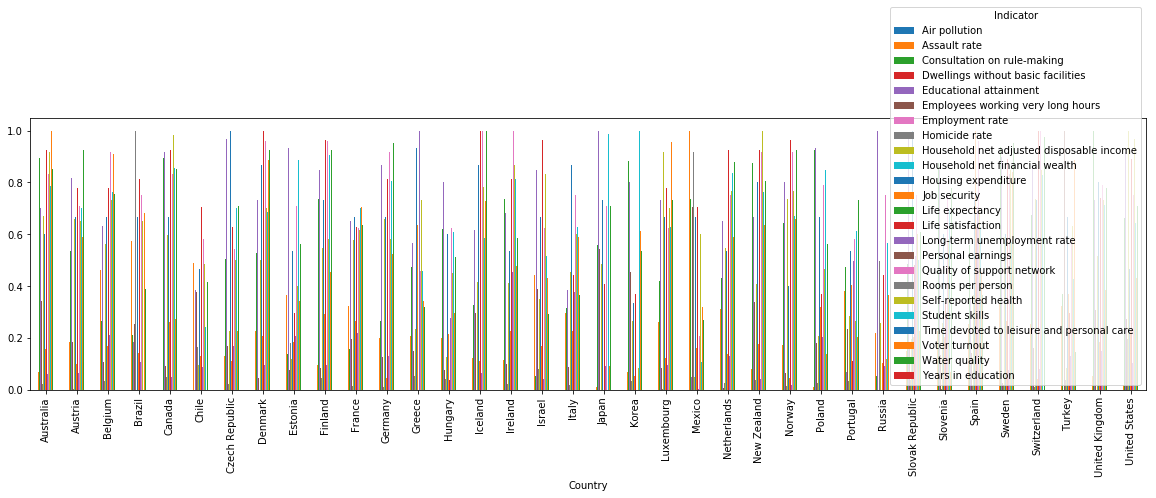

In [42]:
country_indicators_scaled.plot(kind = "bar", figsize=(20,5))

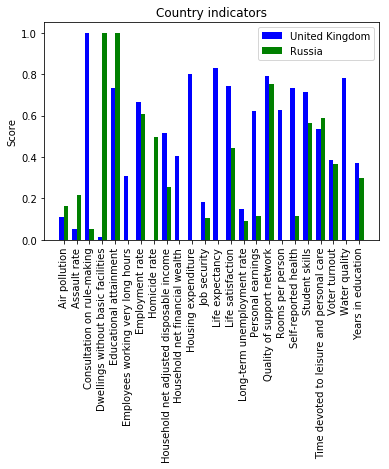

In [115]:
def compare_countries(country1, country2):
    indices = np.arange(len(country_indicators_scaled.columns))
    width = 0.35 # the width of the bars

    df1 = country_indicators_scaled[country_indicators_scaled.index.values == country1].values.flatten()
    df2 = country_indicators_scaled[country_indicators_scaled.index.values == country2].values.flatten()

    rects1 = plt.bar(indices, df1, width, color='b')
    rects2 = plt.bar(indices + width, df2, width, color='g')

    plt.ylabel('Score')
    plt.title('Country indicators')
    plt.xticks(indices + width / 2, country_indicators_scaled.columns, rotation='vertical')
    plt.legend((rects1[0], rects2[0]), (country1, country2))
    plt.figure(figsize=(10,3))
    plt.tight_layout()

    plt.show()
    
compare_countries("United Kingdom", "Russia")    


In [117]:
country_indicators["Life satisfaction"].head()
#sort_values(by="age", inplace=True)

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [121]:
country_indicators_sorted = country_indicators["Life satisfaction"].sort_values(ascending = False)
country_indicators_sorted.head()

Country
Switzerland    7.5
Denmark        7.5
Iceland        7.5
Norway         7.4
Finland        7.4
Name: Life satisfaction, dtype: float64

In [122]:
country_indicators_sorted.tail()

Country
Estonia     5.6
Turkey      5.6
Portugal    5.1
Hungary     4.9
Greece      4.8
Name: Life satisfaction, dtype: float64

In [127]:
gdp_per_capita = pd.read_csv("datasets/lifesat/gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [128]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, Afghanistan to International Monetary Fund, World Economic Outlook Database, April 2016
Data columns (total 6 columns):
Subject Descriptor               189 non-null object
Units                            189 non-null object
Scale                            189 non-null object
Country/Series-specific Notes    188 non-null object
GDP per capita                   187 non-null float64
Estimates Start After            188 non-null float64
dtypes: float64(2), object(4)
memory usage: 10.4+ KB


In [129]:
gdp_per_capita.describe()

,GDP per capita,Estimates Start After
count,187.000000,188.000000
mean,12590.961401,1969.250000
std,17387.035890,291.147823
min,220.860000,0.000000
25%,1783.538000,2011.000000
50%,5373.633000,2013.000000
75%,15490.576500,2014.000000
max,101994.093000,2015.000000


In [130]:
gdp_per_capita[gdp_per_capita.isnull().any(axis=1)]

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Kosovo,"Gross domestic product per capita, current prices",U.S. dollars,Units,NaN,NaN,NaN
Syria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,2010.0
"International Monetary Fund, World Economic Outlook Database, April 2016",NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
gdp_per_capita.dropna(inplace=True)

In [133]:
gdp_per_capita.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=187)

In [134]:
country_indicators.index

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Russia', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States'],
      dtype='object', name='Country')

In [138]:
country_indicators.shape

(36, 24)

In [144]:
full_country_stats = pd.merge(left=country_indicators, right=gdp_per_capita, left_index=True, right_index=True)

In [145]:
full_country_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Australia to United States
Data columns (total 30 columns):
Air pollution                                36 non-null float64
Assault rate                                 36 non-null float64
Consultation on rule-making                  36 non-null float64
Dwellings without basic facilities           36 non-null float64
Educational attainment                       36 non-null float64
Employees working very long hours            36 non-null float64
Employment rate                              36 non-null float64
Homicide rate                                36 non-null float64
Household net adjusted disposable income     36 non-null float64
Household net financial wealth               36 non-null float64
Housing expenditure                          36 non-null float64
Job security                                 36 non-null float64
Life expectancy                              36 non-null float64
Life satisfaction                     

In [146]:
necessary_stats = full_country_stats[["GDP per capita", "Life satisfaction"]]

In [155]:
X = necessary_stats["GDP per capita"].values.reshape(-1, 1)
y = necessary_stats["Life satisfaction"].values.reshape(-1, 1)
X, y

(array([[  50961.865],
        [  43724.031],
        [  40106.632],
        [   8669.998],
        [  43331.961],
        [  13340.905],
        [  17256.918],
        [  52114.165],
        [  17288.083],
        [  41973.988],
        [  37675.006],
        [  40996.511],
        [  18064.288],
        [  12239.894],
        [  50854.583],
        [  51350.744],
        [  35343.336],
        [  29866.581],
        [  32485.545],
        [  27195.197],
        [ 101994.093],
        [   9009.28 ],
        [  43603.115],
        [  37044.891],
        [  74822.106],
        [  12495.334],
        [  19121.592],
        [   9054.914],
        [  15991.736],
        [  20732.482],
        [  25864.721],
        [  49866.266],
        [  80675.308],
        [   9437.372],
        [  43770.688],
        [  55805.204]]), array([[ 7.3],
        [ 6.9],
        [ 6.9],
        [ 7. ],
        [ 7.3],
        [ 6.7],
        [ 6.5],
        [ 7.5],
        [ 5.6],
        [ 7.4],
        [ 6

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, X_test, y_train, y_test

(array([[  29866.581],
        [  41973.988],
        [  43770.688],
        [  50961.865],
        [  43331.961],
        [  20732.482],
        [  51350.744],
        [  27195.197],
        [  13340.905],
        [  40996.511],
        [  43724.031],
        [  74822.106],
        [  40106.632],
        [   9437.372],
        [   8669.998],
        [  80675.308],
        [  37044.891],
        [   9054.914],
        [  37675.006],
        [  43603.115],
        [  32485.545],
        [  12495.334],
        [  17256.918],
        [ 101994.093],
        [  52114.165],
        [  50854.583],
        [  15991.736]]), array([[ 55805.204],
        [ 12239.894],
        [ 19121.592],
        [ 25864.721],
        [ 35343.336],
        [ 49866.266],
        [  9009.28 ],
        [ 18064.288],
        [ 17288.083]]), array([[ 6. ],
        [ 7.4],
        [ 6.8],
        [ 7.3],
        [ 7.3],
        [ 5.7],
        [ 7. ],
        [ 5.8],
        [ 6.7],
        [ 7. ],
        [ 6.9],
   

In [160]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(6.0438740824904791, 1.7852567777631596e-05)

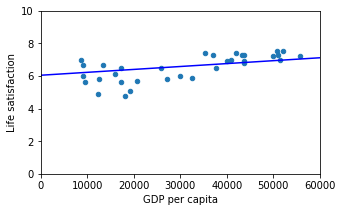

In [161]:
necessary_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.show()

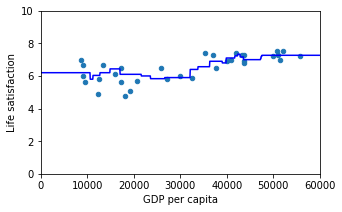

In [168]:
from sklearn import linear_model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
necessary_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, model.predict(X.reshape(-1, 1)), "b")
plt.show()